Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Importing Dataset

In [2]:
dataset = pd.read_csv('Classified Data', index_col = 0)

In [3]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
x = dataset.drop('TARGET CLASS', axis = 1)
y = dataset['TARGET CLASS']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)                           

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
results = pd.DataFrame({'Test set': np.array(y_test), 'Predictions': np.array(y_pred)})

In [10]:
results

,Test set,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
195,1,1
196,1,0
197,1,1
198,0,0


In [11]:
print(confusion_matrix(y_test, y_pred))

[[93  2]
 [10 95]]


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        95
           1       0.98      0.90      0.94       105

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [13]:
#Elbow method for number of 'K
error_rate = []
for i in range(1, 40):
  classifier_i = KNeighborsClassifier(n_neighbors= i)
  classifier_i.fit(x_train, y_train)
  y_pred_i = classifier_i.predict(x_test)
  error_rate.append(np.mean(y_pred_i != y_test))

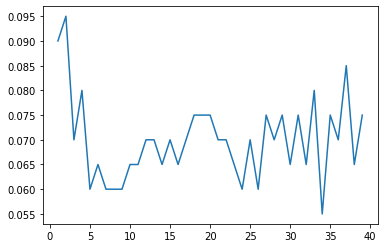

In [14]:
plt.plot(range(1, 40), error_rate)

In [15]:
#Choosing K = 15

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric= 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
results = pd.DataFrame({'Test set': np.array(y_test), 'Predictions': np.array(y_pred)})

In [19]:
results

,Test set,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
195,1,1
196,1,0
197,1,1
198,0,0


In [20]:
print(confusion_matrix(y_test, y_pred))

[[90  5]
 [ 9 96]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.95      0.91      0.93       105

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

